#Reinforcement Learning

## Description:

#### Code:
The provided code implements a reinforcement learning algorithm to train an agent to balance a pole on a moving cart in the CartPole-v1 environment. The environment is part of the OpenAI Gym toolkit, and the goal is to teach the agent a policy (a strategy) to maximize the total reward it receives over a series of episodes.

#### Dataset:
In reinforcement learning, there isn't a traditional dataset as in supervised learning. Instead, the agent collects experiences (observations, actions, rewards, next observations) as it interacts with the environment. These experiences are stored in a "replay memory" to be used for training the learning model.

#### Model:
The learning model is a neural network, implemented using TensorFlow's Keras API. The neural network takes the current state of the environment as input and outputs Q-values for each possible action. Q-values represent the expected cumulative reward if a particular action is taken in a given state. The model is trained using a Q-learning algorithm, which involves updating its parameters based on experiences stored in the replay memory.

### Key Components:

1. **Environment Setup:**
   - The code sets up the CartPole-v1 environment using the OpenAI Gym library.
   - It determines the size of the state space and the number of possible actions in the environment.

2. **Q-Learning Parameters:**
   - Hyperparameters like learning rate, discount factor (gamma), exploration rate (epsilon), and others are defined to control the learning process.

3. **Q-Network:**
   - The neural network (Q-network) is a simple architecture with an input layer, two hidden layers, and an output layer.
   - It uses rectified linear unit (ReLU) activation functions for the hidden layers and linear activation for the output layer.

4. **Training Loop:**
   - The agent goes through a specified number of episodes, interacting with the environment and learning from its experiences.
   - Exploration-exploitation is balanced using an epsilon-greedy strategy: the agent either explores a random action with a certain probability or exploits the learned policy by choosing the action with the highest Q-value.

5. **Experience Replay:**
   - The agent stores experiences in a replay memory, which is randomly sampled during training to break correlations between consecutive experiences.

6. **Training the Q-Network:**
   - The Q-network is trained using a form of Q-learning. Target Q-values are updated based on the Bellman equation, reflecting the expected cumulative reward.
   - The model is trained with stochastic gradient descent using experiences sampled from the replay memory.

7. **Visualization:**
   - The code visualizes the learning progress by plotting the total reward obtained in each episode over time.

8. **Testing:**
   - After training, the model is tested over a few episodes to evaluate its performance in the environment.


In [ ]:
# Import necessary libraries
import gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Environment setup
env = gym.make('CartPole-v1')  # Create CartPole environment
state_size = env.observation_space.shape[0]  # Get the state size
action_size = env.action_space.n  # Get the number of possible actions

# Q-learning parameters
learning_rate = 0.001  # Learning rate for the Q-network
gamma = 0.95  # Discount factor for future rewards
epsilon = 1.0  # Exploration-exploitation trade-off, initial exploration rate
epsilon_decay = 0.995  # Decay rate for exploration rate
epsilon_min = 0.01  # Minimum exploration rate
memory_size = 1000  # Size of the replay memory
batch_size = 32  # Batch size for training the Q-network

# Build the Q-network using a simple neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, input_dim=state_size, activation='relu'),  # Input layer with ReLU activation
    tf.keras.layers.Dense(24, activation='relu'),  # Hidden layer with ReLU activation
    tf.keras.layers.Dense(action_size, activation='linear')  # Output layer with linear activation
])
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))  # Compile the model using mean squared error loss and Adam optimizer

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step
Episode: 260, Average Reward: 60.9, Epsilon: 0.2702863258025825
1/1 [==============================] - 0s 30ms/step
Episode: 270, Average Reward: 73.8, Epsilon: 0.2570720625972084
1/1 [==============================] - 0s 36ms/step
Episode: 280, Average Reward: 85.7, Epsilon: 0.24450384299593592
1/1 [==============================] - 0s 30ms/step
Episode: 290, Average Reward: 62.6, Epsilon: 0.23255008201124722
1/1 [==============================] - 0s 27ms/step


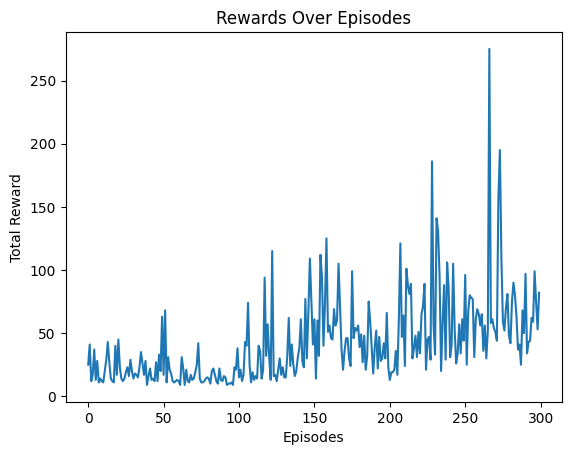

1/1 [==============================] - 0s 21ms/step
Average Test Reward: 40.9


In [5]:
# Initialize replay memory
memory = []

# Training the agent
num_episodes = 300
rewards = []

for episode in range(num_episodes):
    state = env.reset()  # Reset the environment for a new episode
    state = np.reshape(state, [1, state_size])  # Reshape the state for the neural network input
    total_reward = 0  # Initialize total reward for the episode

    while True:
        # Epsilon-greedy exploration
        if np.random.rand() <= epsilon:
            action = env.action_space.sample()  # Explore by choosing a random action
        else:
            action = np.argmax(model.predict(state))  # Exploit by choosing the action with the highest Q-value

        next_state, reward, done, _ = env.step(action)  # Take the chosen action in the environment
        next_state = np.reshape(next_state, [1, state_size])  # Reshape the next state for the neural network input

        # Store the experience in replay memory
        memory.append((state, action, reward, next_state, done))
        if len(memory) > memory_size:
            memory.pop(0)  # Remove the oldest experience if memory size exceeds the limit

        state = next_state
        total_reward += reward

        if done:
            # Experience replay
            if len(memory) >= batch_size:
                batch_indices = np.random.choice(len(memory), batch_size, replace=False)
                batch = [memory[i] for i in batch_indices]
                for s, a, r, ns, d in batch:
                    target = r
                    if not d:
                        target = r + gamma * np.amax(model.predict(ns)[0])  # Update Q-value using the Bellman equation
                    target_f = model.predict(s)
                    target_f[0][a] = target
                    model.fit(s, target_f, epochs=1, verbose=0)  # Train the Q-network with the updated target

            # Update exploration rate
            if epsilon > epsilon_min:
                epsilon *= epsilon_decay

            break

    rewards.append(total_reward)

    # Display episode information
    if episode % 10 == 0:
        average_reward = np.mean(rewards[-10:])
        print(f"Episode: {episode}, Average Reward: {average_reward}, Epsilon: {epsilon}")

# Data Visualization
plt.plot(rewards)
plt.title('Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()

# Model Performance Evaluation
test_episodes = 10
test_rewards = []

for _ in range(test_episodes):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0

    while True:
        action = np.argmax(model.predict(state))
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        state = next_state
        total_reward += reward

        if done:
            break

    test_rewards.append(total_reward)

print(f"Average Test Reward: {np.mean(test_rewards)}")

# Close the environment
env.close()

#Conclusion

The training results suggest that the agent has learned a policy that performs well in the CartPole-v1 environment. The average reward during training episodes consistently increases, reaching 62.6 by episode 290. The exploration rate (epsilon) decreases over episodes, indicating a shift from exploration to exploitation as the agent refines its policy.

However, the average test reward is 40.9, which is lower than the average reward during training episodes. This could indicate some degree of overfitting to the training environment or a need for further hyperparameter tuning. It's also possible that the learned policy does not generalize well to unseen states.

In conclusion, the agent demonstrates learning in the training environment, but its performance on the test episodes may indicate a need for additional refinement or evaluation in different scenarios to ensure robustness and generalization. Further analysis and experimentation, such as adjusting hyperparameters or testing in diverse environments, could help improve the agent's overall performance.